## Chapter 2

### Introduction to Interpretability in Machine Learning
#### Here we will look at some of the Inherently Interpretable model

##### In this example of a Random Forest model, we will look at the inherent element of the trained model in augmenting our understanding of its internal process

**Supervised Learning - Random Forest**

We use the diabetes dataset from sklearn. <br>

This is a Classification problem and we will use a Random Forest model to classify and understand the model's internals.<br>


We are using the sklearn diabetes datasets. More details on the dataset can be found here <br>
 https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset




|**age**|age in years|
|-------|------------|
|**sex**|gender|
|**bmi**|body mass index|
|**bp** | average blood pressure |
| **s1** | tc, total serum cholesterol |
| **s2**  | ldl, low-density lipoproteins |
| **s3**  | hdl, high-density lipoproteins |
| **s4** | tch, total cholesterol / HDL |
| **s5** | ltg, possibly log of serum triglycerides level |
| **s6** | glu, blood sugar level |

**Import the required libraries**

In [1]:
# Import the necessary libraries
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


**Load the dataset, convert it into a classification problem, split the dataset and train the Random Forest Model**

In [3]:
# Load the diabetes dataset
diabetes = load_diabetes()

# Create a pandas DataFrame from the dataset
df = pd.DataFrame(data=np.c_[diabetes['data'], diabetes['target']],
                  columns=diabetes['feature_names'] + ['target'])

# Convert the target variable into a binary variable
median_value = df['target'].median()
df['target'] = (df['target'] >= median_value).astype(int)

# Train-test split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model with 50 trees or estimators
forest = RandomForestClassifier(n_estimators=50, random_state=42)
forest.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50, random_state=42)

**The trained model is used to predict on the test dataset and the accuracy is computed**

In [4]:
# Make predictions on the test set
y_pred = forest.predict(X_test)

# Calculate the accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print the accuracy metrics
print("Accuracy:", np.round(accuracy,3))
print("Confusion Matrix:\n", cm)

Accuracy: 0.742
Confusion Matrix:
 [[38 11]
 [12 28]]


**Feature importance of the random forest is extracted and displayed**

In [5]:
# Print the feature importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": forest.feature_importances_})

feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
feature_importance_series = pd.Series(feature_importance['Importance'].values, index=feature_importance['Feature'].values)
print(feature_importance_series)

bmi    0.218705
s5     0.149231
bp     0.129069
s2     0.100357
s3     0.088594
age    0.078156
s6     0.077821
s1     0.077379
s4     0.062547
sex    0.018140
dtype: float64


**The feature importance values are displayed as a bar plot**

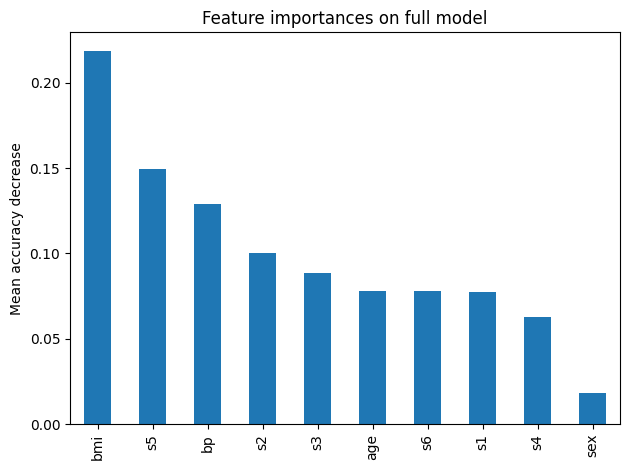

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
feature_importance_series.plot.bar(ax=ax)
ax.set_title("Feature importances on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

The importance of a feature is also known as the Gini importance. Gini importance measures the influence or importance it is in making decisions. 

**This time we find the permutation feature importance for the random forest model**

In [66]:
from sklearn.inspection import permutation_importance


result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)


forest_importances = pd.Series(result.importances_mean, index=X.columns)
print(forest_importances)

age   -0.002247
sex    0.015730
bmi    0.047191
bp     0.011236
s1    -0.005618
s2     0.015730
s3     0.013483
s4     0.011236
s5     0.046067
s6     0.002247
dtype: float64


**Plot the permutation feature importance as a bar plot**

Standard deviation for each feature is also plotted as a reference.

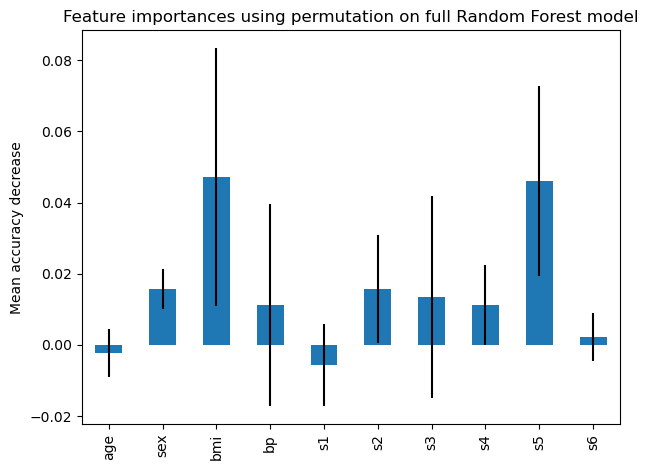

In [67]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full Random Forest model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Permutation technique is particularly useful for non-linear models or estimators. It involves randomly shuffling the values of a single feature and observing the resulting degradation of the model’s score. We discuss permutation methods in future chapters.

More details on this particular implemenation can be found on the sklearn documentation.
https://scikit-learn.org/stable/modules/permutation_importance.html

